In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Data collection and Processing 

In [2]:
ds_salary = pd.read_csv('ds_salaries.csv')

In [5]:
ds_salary.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


#### Checking the dataset
* As we can observe thath we have 697 entries and 12 columns
* We have only one numerical data all other datas are categorical

In [3]:
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
# Checking the number of column and rows
ds_salary.shape

(607, 12)

#### Statistical Model
* Reviewing statistical model of dataset including mean, standard deviation, min max and etc
* Meanwhile dropping unuseful columns

In [7]:
# Statistical model
ds_salary.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [8]:
# Dropping unuseful columns
ds_salary=ds_salary.drop(['Unnamed: 0'],axis=1)
ds_salary=ds_salary.drop(['salary'],axis=1)

#### Checking null values
* Cheking null values are important part of data processing. 
* Actually for making an precise analysis its desirable that there are not null values


In [9]:
# Cheching the columns  
ds_salary.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
# Checking the null value 
ds_salary.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Data wrangling and cleaning 


#### Editing row identity for better processing
* Editing 'Experinece level' column
* Editing 'Employment type' column
* Editing 'Company size' column
* Editing 'Remote ratio' column

In [11]:
ds_salary.value_counts(['experience_level'])

experience_level
SE                  280
MI                  213
EN                   88
EX                   26
dtype: int64

In [12]:
# Renaname the Experience column
ds_salary.replace({'experience_level':{'SE':'Senior','MI':'Middle','EN':'Entry-level', 'EX':'Executive-level'}}, inplace=True)

In [13]:
# Check the row
ds_salary.value_counts(['experience_level'])

experience_level
Senior              280
Middle              213
Entry-level          88
Executive-level      26
dtype: int64

In [14]:
ds_salary['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [15]:
# Rename the Employment column
ds_salary.replace({'employment_type':{'FT':'Full-Time', 'CT':'Contract', 'PT':'Part-Time', 'FL':'Freelance'}},inplace=True)

In [16]:
# Check the row
ds_salary.value_counts(['employment_type'])

employment_type
Full-Time          588
Part-Time           10
Contract             5
Freelance            4
dtype: int64

In [17]:
ds_salary['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [18]:
# Renanme the Company size rows
ds_salary.replace({'company_size':{'L':'Large-cap','S':'Small-cap','M':'Mid-cap'}}, inplace=True)

In [19]:
# Check the rows
ds_salary['company_size'].unique()

array(['Large-cap', 'Small-cap', 'Mid-cap'], dtype=object)

In [20]:
ds_salary['remote_ratio'].unique()

array([  0,  50, 100], dtype=int64)

In [21]:
# Rename the Remote ratio rows
ds_salary.replace({'remote_ratio':{0:'On-Site', 50:'Hybrid', 100:'Fully-Remote'}}, inplace=True)

In [22]:
#Check the rows
ds_salary['remote_ratio'].value_counts()

Fully-Remote    381
On-Site         127
Hybrid           99
Name: remote_ratio, dtype: int64

### Insights 

In [23]:
ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Middle,Full-Time,Data Scientist,EUR,79833,DE,On-Site,DE,Large-cap
1,2020,Senior,Full-Time,Machine Learning Scientist,USD,260000,JP,On-Site,JP,Small-cap
2,2020,Senior,Full-Time,Big Data Engineer,GBP,109024,GB,Hybrid,GB,Mid-cap
3,2020,Middle,Full-Time,Product Data Analyst,USD,20000,HN,On-Site,HN,Small-cap
4,2020,Senior,Full-Time,Machine Learning Engineer,USD,150000,US,Hybrid,US,Large-cap


### Observation
#### As we can observe here that single numerical data in dataset is Right Skewed 

<Axes: xlabel='salary_in_usd', ylabel='Density'>

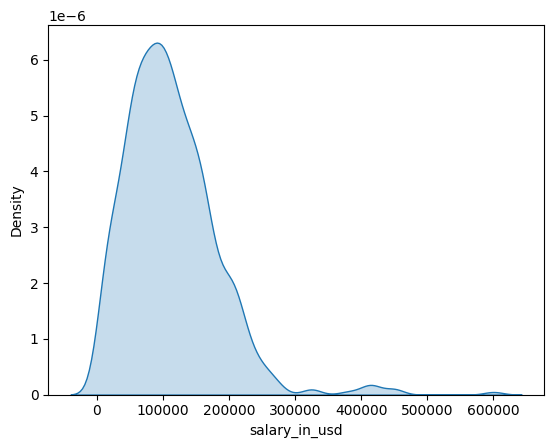

In [24]:

sns.kdeplot(data=ds_salary, x='salary_in_usd', shade=True,bw=0.2)

### Observation
##### Most Preferable work enviroment in Data science are Remote job

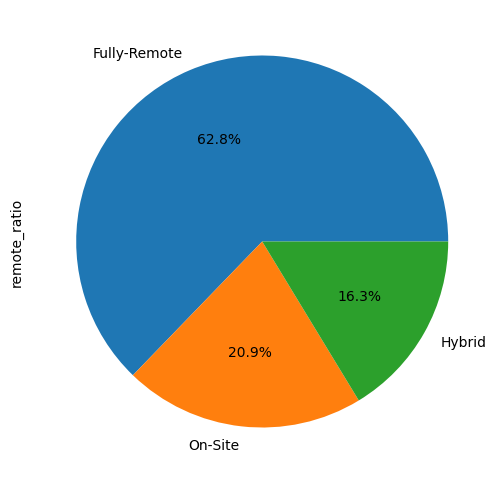

In [25]:
pie =ds_salary['remote_ratio'].value_counts()
pie.plot(kind='pie', subplots=True, figsize=(6, 10),autopct='%1.1f%%')
plt.show()


In [26]:
ds_salary['remote_ratio'].value_counts()

Fully-Remote    381
On-Site         127
Hybrid           99
Name: remote_ratio, dtype: int64

### Observation
#### We can observe here senior level make up the majority. For previous two year was was Mid-level. We can observe that from year to year the qualification of professionals is growing 

<Axes: xlabel='work_year', ylabel='count'>

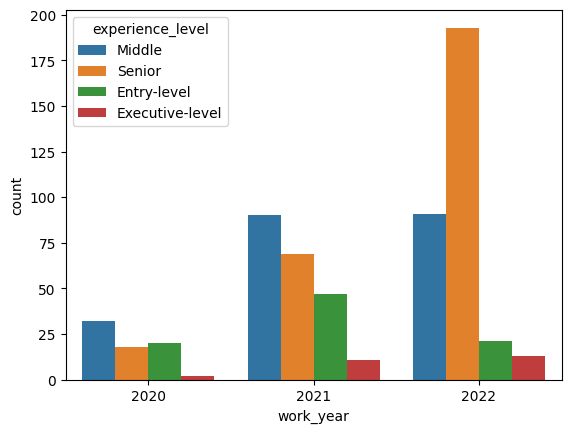

In [27]:
sns.countplot(data=ds_salary,x='work_year',hue='experience_level') 

### Observation
#### In this graph we can observe that the highest salaries are for Large and Mid companies. But Large companies are more sustainable. If we concern on 2020-2021 year during the pandemic period we see the strong volatility in Mid-cap companies. Small-cap are also sustainble but with less salaries 

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

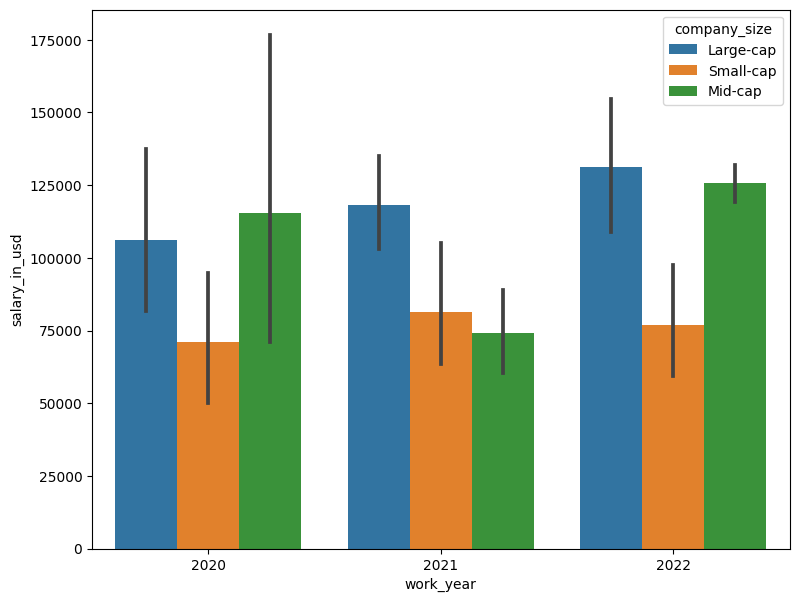

In [28]:
plt.figure(figsize=(9,7))
sns.barplot(x='work_year', y='salary_in_usd',data=ds_salary, hue='company_size',estimator=np.mean)


### Obesration
#### In this part we can see the average salary based on employment type.  Contract workers are highest paying 

In [29]:
#preparing data for further presentation
emp_type=ds_salary.groupby(["employment_type"])["salary_in_usd"].mean().to_frame()
emp_type

,salary_in_usd
employment_type,
Contract,184575.000000
Freelance,48000.000000
Full-Time,113468.073129
Part-Time,33070.500000


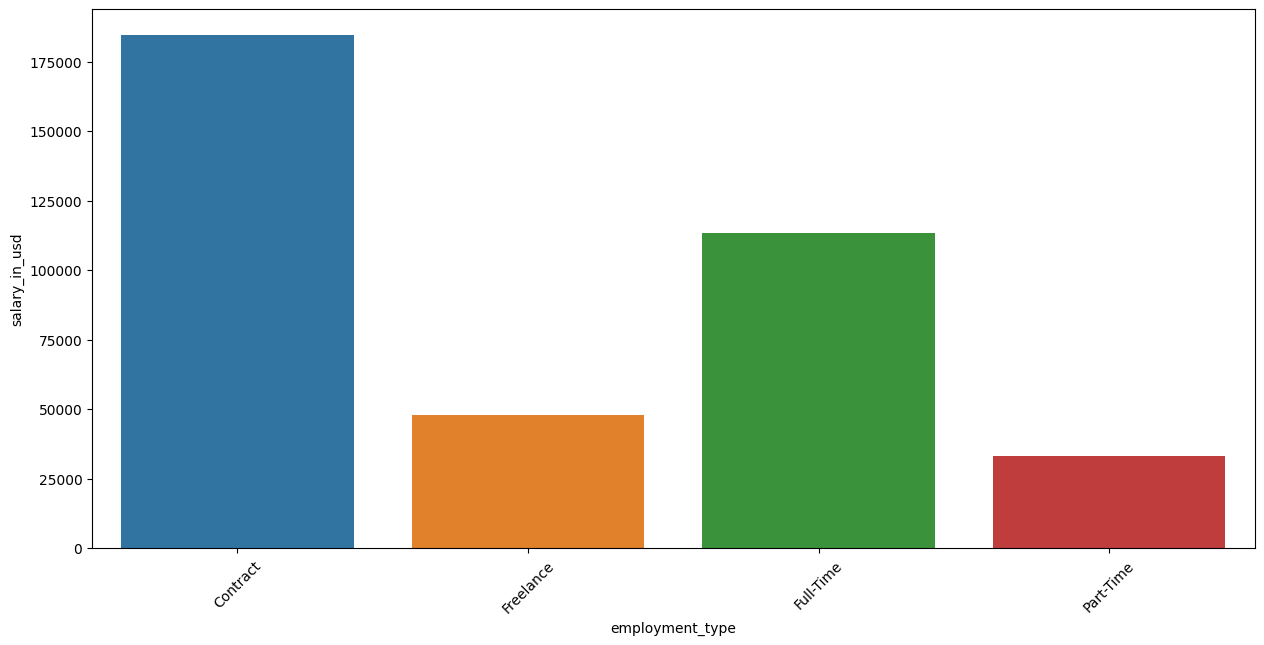

In [30]:
#In this graph we can observe the average salary based on employment type. 
plt.figure(figsize=(15,7))
sns.barplot(x=et.index,y=et["salary_in_usd"],data=et)
plt.xticks(rotation=45)
plt.show()


### Observation
#### This graph show top 10 average salary jobs in Data Science field. Highest paying average salary is Data Analytics Lead with almost 400k salary

In [32]:
# Preparing top 10 job titles
ds_salary['job_title'].value_counts()[:10]

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64

In [33]:
# Preparing data for further visualization
job_title=ds_salary.groupby(["job_title"])["salary_in_usd"].mean().sort_values(ascending=False)[:10]
job_title=job_title.to_frame()
job_title

,salary_in_usd
job_title,
Data Analytics Lead,405000.000000
Principal Data Engineer,328333.333333
Financial Data Analyst,275000.000000
Principal Data Scientist,215242.428571
Director of Data Science,195074.000000
Data Architect,177873.909091
Applied Data Scientist,175655.000000
Analytics Engineer,175000.000000
Data Specialist,165000.000000


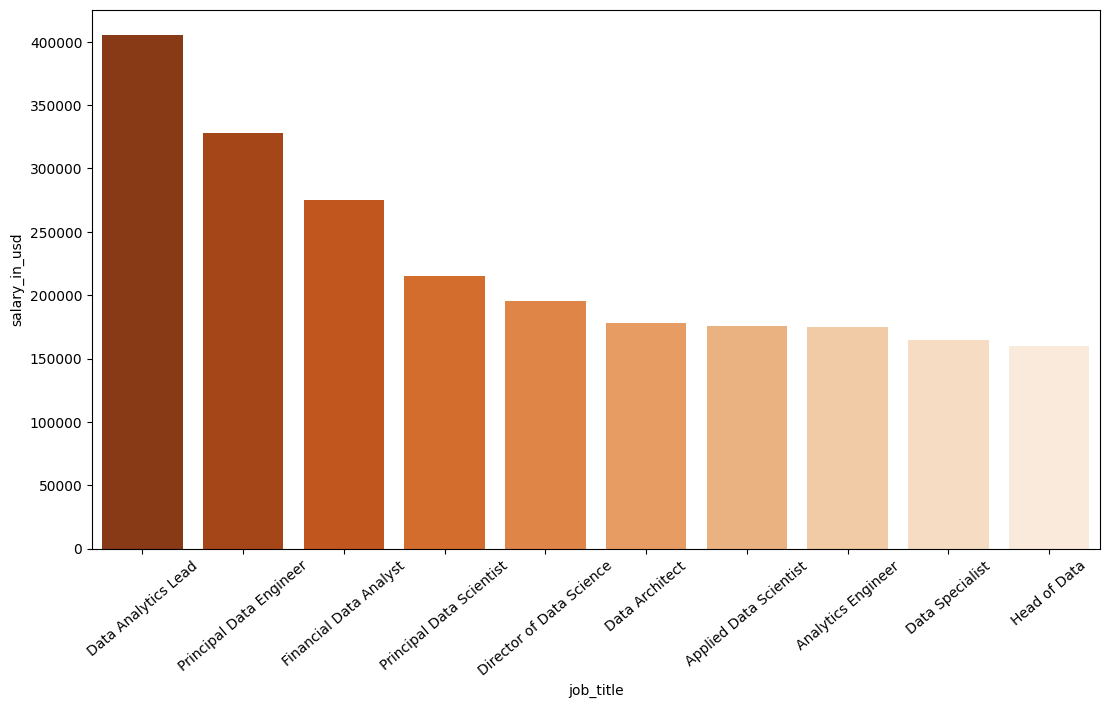

In [41]:
plt.figure(figsize=(13,7))
sns.barplot(x=jt.index,y=jt["salary_in_usd"],data=jt,palette="Oranges_r")
plt.xticks(rotation=40)
plt.show()

### Observation 
#### Here we can observe Highest paid job titles in Data Science Field. Highest paying is Principal Data Engineer with almost 600k wage

In [51]:
top_10=ds_salary.nlargest(10,"salary_in_usd")[["job_title",'salary_in_usd']].set_index('job_title')
top_10

,salary_in_usd
job_title,
Principal Data Engineer,600000
Research Scientist,450000
Financial Data Analyst,450000
Applied Machine Learning Scientist,423000
Principal Data Scientist,416000
Data Scientist,412000
Data Analytics Lead,405000
Applied Data Scientist,380000
Director of Data Science,325000


Text(0.5, 1.0, 'Higest Paid Job Titles')

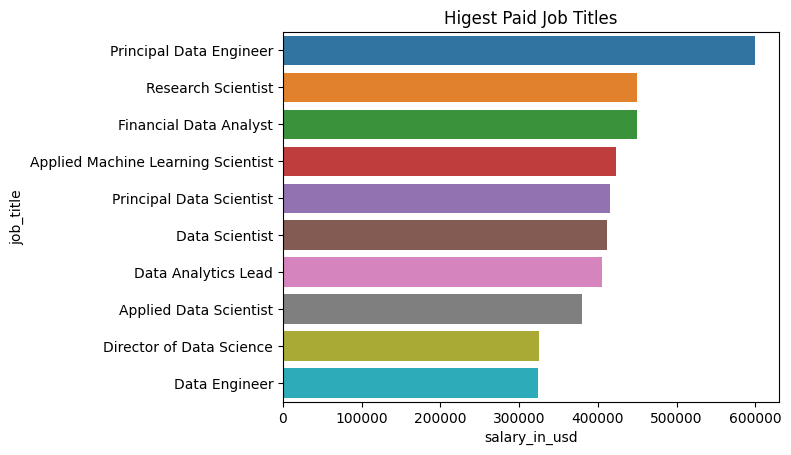

In [58]:
sns.barplot(x='salary_in_usd',y=top_10.index,data=top_10)
plt.title('Higest Paid Job Titles')

### Observation 
#### As we observe that Russia pays a highest average salary in Data Science field 

In [4]:
#Storing  top 10 highest paying salary by countries for further inshight
country_salary = ds_salary.groupby(["company_location"])["salary_in_usd"].agg(["mean"]).sort_values(by="mean",ascending=False)[:10]
country_salary

,mean
company_location,
RU,157500.000000
US,144055.261972
NZ,125000.000000
IL,119059.000000
JP,114127.333333
AU,108042.666667
AE,100000.000000
DZ,100000.000000
IQ,100000.000000


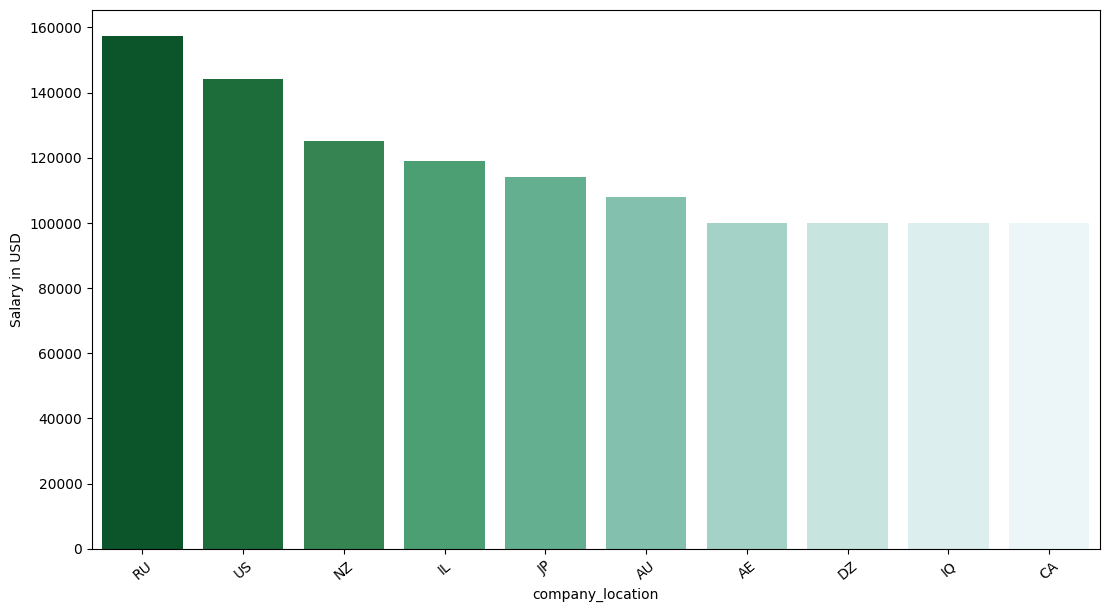

In [5]:
plt.figure(figsize=(13,7))
sns.barplot(x=country_salary.index,y="mean",data=country_salary,palette="BuGn_r")
plt.ylabel('Salary in USD')
plt.xticks(rotation=40)
plt.show()

In [38]:
ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Middle,Full-Time,Data Scientist,EUR,79833,DE,On-Site,DE,Large-cap
1,2020,Senior,Full-Time,Machine Learning Scientist,USD,260000,JP,On-Site,JP,Small-cap
2,2020,Senior,Full-Time,Big Data Engineer,GBP,109024,GB,Hybrid,GB,Mid-cap
3,2020,Middle,Full-Time,Product Data Analyst,USD,20000,HN,On-Site,HN,Small-cap
4,2020,Senior,Full-Time,Machine Learning Engineer,USD,150000,US,Hybrid,US,Large-cap


### Observation 
#### Detecting outliers

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

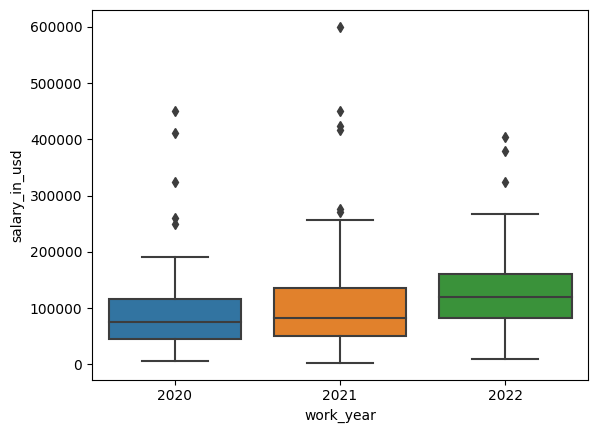

In [40]:
sns.boxplot(data=ds_salary,x='work_year',y='salary_in_usd')

### Observation
#### Lets drop outliers for more precise analysis

In [48]:
#Lets drop outliers
Q1 = ds_salary['salary_in_usd'].quantile(0.25)
Q3 = ds_salary['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

no_outliers = ds_salary[(ds_salary['salary_in_usd'] >= Q1 - 1.5 * IQR) & (ds_salary['salary_in_usd'] <= Q3 + 1.5 * IQR)]

### Observation 
#### As we can obsereve here the strong increase in salary in the Data science job from year to year. We can make an assumption that the demand for professionals in this field are increasing each year

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

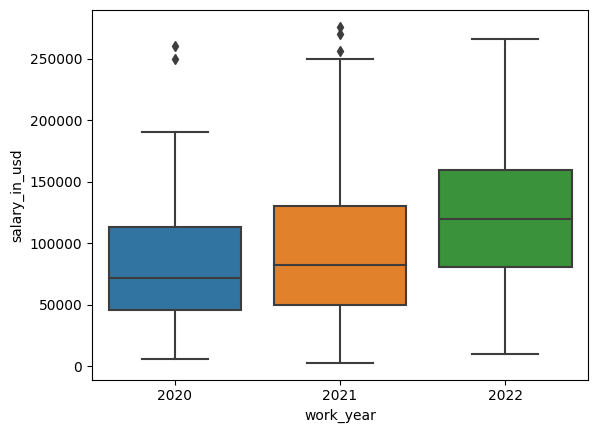

In [49]:
sns.boxplot(data=no_outliers,x='work_year',y='salary_in_usd')